# N Asset Efficient Frontier

In [1]:
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [2]:
ind = erk.get_ind_return()
er = erk.annualize_return(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

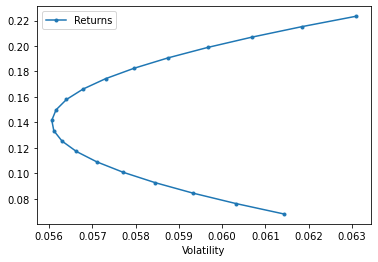

In [3]:
l = ["Games","Fin"]
erk.plot_ef2(20,er[l],cov.loc[l,l])

In [8]:

def minimize_volatility(target_return, er, cov):
    """
    target return -> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    return_is_target = {
        'type':'eq',
        'args': (er,),
        'fun': lambda weights, er : target_return - erk.portfolio_return(weights,er)
    }
    weights_sum_to_one = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol,init_guess,
                       args=(cov,),
                       method='SLSQP',
                       options={'disp':False},
                       constraints=(return_is_target,weights_sum_to_one),
                       bounds=bounds
                      )
    return results.x
    
        

In [4]:
w15 = erk.minimize_volatility(0.15,er[l],cov.loc[l,l])
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [11]:
def optimal_weights(n_points,er,cov):
    """
    list of weights to run optimizer on to minimize volatility
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [ erk.minimize_volatility(target_return, er, cov) for target_return in target_rs]
    return weights


def plot_efN(n_points, er, cov):
    """
    Plot 2 asset efficient frontier
    """

    weights = optimal_weights(n_points,er,cov)
    rets = [erk.portfolio_return(w,er) for w in weights]
    vols = [erk.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    return ef.plot.line(x="Volatility",y="Returns",style=".-")

In [5]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

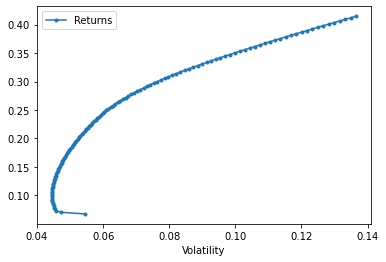

In [7]:
l = ["Smoke","Fin","Games","Coal","Meals"]
erk.plot_efN(125,er[l],cov.loc[l,l])

In [15]:
print(np.round(erk.minimize_volatility(0.30,er[l],cov.loc[l,l])*100),3)

[ 0. 60.  0. 40.  0.] 3
